cpu
Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.6e+03  |
|    ep_rew_mean     | -105     |
| time/              |          |
|    fps             | 1039     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 628         |
|    ep_rew_mean          | -109        |
| time/                   |             |
|    fps                  | 681         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009159551 |
|    clip_fraction        | 0.108       |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.64       |
|    explained_v

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 569          |
|    ep_rew_mean          | -107         |
| time/                   |              |
|    fps                  | 645          |
|    iterations           | 11           |
|    time_elapsed         | 34           |
|    total_timesteps      | 22528        |
| train/                  |              |
|    approx_kl            | 0.0057870587 |
|    clip_fraction        | 0.0654       |
|    clip_range           | 0.2          |
|    entropy_loss         | -5.57        |
|    explained_variance   | 0.393        |
|    learning_rate        | 0.0003       |
|    loss                 | 27.4         |
|    n_updates            | 100          |
|    policy_gradient_loss | -0.00649     |
|    std                  | 0.975        |
|    value_loss           | 45.5         |
------------------------------------------
-----------------------------------------
| rollout/  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 704         |
|    ep_rew_mean          | -102        |
| time/                   |             |
|    fps                  | 653         |
|    iterations           | 20          |
|    time_elapsed         | 62          |
|    total_timesteps      | 40960       |
| train/                  |             |
|    approx_kl            | 0.011844352 |
|    clip_fraction        | 0.13        |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.17       |
|    explained_variance   | 0.525       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0364      |
|    n_updates            | 190         |
|    policy_gradient_loss | -0.0116     |
|    std                  | 0.875       |
|    value_loss           | 0.0925      |
-----------------------------------------
-----------------------------------------
| rollout/                |       

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 667         |
|    ep_rew_mean          | -101        |
| time/                   |             |
|    fps                  | 659         |
|    iterations           | 29          |
|    time_elapsed         | 90          |
|    total_timesteps      | 59392       |
| train/                  |             |
|    approx_kl            | 0.007891239 |
|    clip_fraction        | 0.0823      |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.03       |
|    explained_variance   | 0.915       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.55        |
|    n_updates            | 280         |
|    policy_gradient_loss | -0.00851    |
|    std                  | 0.851       |
|    value_loss           | 7.26        |
-----------------------------------------
-----------------------------------------
| rollout/                |       

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 734         |
|    ep_rew_mean          | -93.9       |
| time/                   |             |
|    fps                  | 664         |
|    iterations           | 38          |
|    time_elapsed         | 117         |
|    total_timesteps      | 77824       |
| train/                  |             |
|    approx_kl            | 0.008583674 |
|    clip_fraction        | 0.0925      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.8        |
|    explained_variance   | 0.88        |
|    learning_rate        | 0.0003      |
|    loss                 | 3.08        |
|    n_updates            | 370         |
|    policy_gradient_loss | -0.00394    |
|    std                  | 0.803       |
|    value_loss           | 5.27        |
-----------------------------------------
------------------------------------------
| rollout/                |      

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 827          |
|    ep_rew_mean          | -80.1        |
| time/                   |              |
|    fps                  | 666          |
|    iterations           | 47           |
|    time_elapsed         | 144          |
|    total_timesteps      | 96256        |
| train/                  |              |
|    approx_kl            | 0.0101931775 |
|    clip_fraction        | 0.0924       |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.72        |
|    explained_variance   | 0.26         |
|    learning_rate        | 0.0003       |
|    loss                 | 45.5         |
|    n_updates            | 460          |
|    policy_gradient_loss | -0.00874     |
|    std                  | 0.788        |
|    value_loss           | 32           |
------------------------------------------
-----------------------------------------
| rollout/  

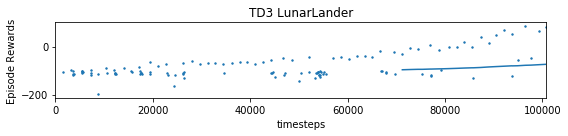

In [1]:
import os

import gym
import numpy as np
import matplotlib.pyplot as plt
import time

from stable_baselines3 import PPO
from stable_baselines3.common import results_plotter
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.callbacks import BaseCallback, StopTrainingOnRewardThreshold, EvalCallback

import torch
torch.cuda.is_available = lambda : False
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

rew_step = []
scores1 = []



class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq:
    :param log_dir: Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: Verbosity level.
    """
    def __init__(self, check_freq: int, log_dir: str, verbose: int = 1):
        super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        global scores1
        a = True
        # Retrieve training reward
        x, y = ts2xy(load_results(self.log_dir), 'timesteps')
        if len(x) > 0:
            # Mean training reward over the last 100 episodes
            mean_reward = np.mean(y[-100:])
        else:
            mean_reward = 0
        if mean_reward > 200:
            a = False
            print(a)

        return a

    
class EvalCallback(BaseCallback):
    """
    Callback for evaluating an agent.

    :param eval_env: (gym.Env) The environment used for initialization
    :param n_eval_episodes: (int) The number of episodes to test the agent
    :param eval_freq: (int) Evaluate the agent every eval_freq call of the callback.
    """
    def __init__(self, eval_env, n_eval_episodes=10, eval_freq=2048):
        super(EvalCallback, self).__init__()
        self.eval_env = eval_env
        self.n_eval_episodes = n_eval_episodes
        self.eval_freq = eval_freq
        self.best_mean_reward = -np.inf
  
    def _on_step(self):
        """
        This method will be called by the model.

        :return: (bool)
        """
        global rew_step
        a = True
        # self.n_calls is automatically updated because
        # we derive from BaseCallback
        if self.n_calls % self.eval_freq == 0:
            
            state = self.eval_env.reset()
            score = 0
            scores = []
            done = False
            for ii in range(10):
                while done == False:
                    action, _ = self.model.predict(state, deterministic=False)
                    state, reward, done, _ = self.eval_env.step(action)
                    score += reward
                done = False
                scores.append(score)
                score = 0
                state = self.eval_env.reset()

            self.eval_env.close()
            scores_step = sum(scores)/10
            rew_step.append(scores_step)

        return True    
    
    
# Create log dir
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

# Create and wrap the environment
env = gym.make('CartPole-v0')
eval_env = gym.make('CartPole-v0')

env = Monitor(env, log_dir)

# Create the callback: check every 1000 steps
callback1 = SaveOnBestTrainingRewardCallback(check_freq=2048, log_dir=log_dir)
callback2 = EvalCallback(eval_env)


# Train the agent
model = PPO('MlpPolicy', env, verbose=2)
timesteps = 102400
start = time.time()
model.learn(total_timesteps=int(timesteps))
print((time.time()-start)/60)


# Save rewards of each episode
_, y = ts2xy(load_results(log_dir), 'timesteps')
rew_ep = [int(a) for a in y]
print(rew_ep)